# LFC Data Analysis: The Transfers

See Terry's blog [Inspiring Transfers](http://terrydolan.blogspot.co.uk/2015/09/inspiring-transfers.html) for a discussion of the data analysis.

This notebook analyses Liverpool FC's transfers over the last 5 seasons, from 2011-2012 to 2014-15. It also compares Liverpool's average net transfer spend, revenue and wage bill to the other teams in the top 6.

The analysis uses [IPython Notebook](http://ipython.org/notebook.html), [python](https://www.python.org/), [pandas](http://pandas.pydata.org/) and [matplotlib](http://matplotlib.org/) to explore the data. 

## Set-up

Import the modules needed for the analysis.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sys
import collections
from datetime import datetime
from __future__ import division

# enable inline plotting
%matplotlib inline

Print version numbers.

In [2]:
print 'python version: {}'.format(sys.version)
print 'pandas version: {}'.format(pd.__version__)
print 'matplotlib version: {}'.format(mpl.__version__)
print 'numpy version: {}'.format(np.__version__)

python version: 2.7.8 |Anaconda 2.3.0 (64-bit)| (default, Jul  2 2014, 15:12:11) [MSC v.1500 64 bit (AMD64)]
pandas version: 0.16.2
matplotlib version: 1.4.3
numpy version: 1.9.2


## Load the data into a dataframes and munge

#### Create dataframe of LFC transfers
Data source: lfchistory.net

Note that all transfers are shown for FSG's ownership, from Oct 2010 to September 2015. 

In [3]:
LFC_TRANSFERS_CSV_FILE = 'data\lfc_transfers_2010-2011_2015-2016.csv'
dflfc_transfers = pd.read_csv(LFC_TRANSFERS_CSV_FILE, parse_dates=['Date'])

# convert Fee to millions of pounds
dflfc_transfers.Fee = dflfc_transfers.Fee/1000000

# show shape
dflfc_transfers.shape

(90, 6)

In [4]:
dflfc_transfers.head()

,Season,Direction,Player,Club,Fee,Date
0,2010-2011,In,Luis Suarez,Ajax,22.8,2011-01-31
1,2010-2011,In,Andy Carroll,Newcastle United,35.0,2011-01-31
2,2010-2011,Out,Charles Itandje,Atromitos,0.0,2011-01-01
3,2010-2011,Out,Ryan Babel,Hoffenheim,5.8,2011-01-25
4,2010-2011,Out,Fernando Torres,Chelsea,50.0,2011-01-31


In [5]:
dflfc_transfers.tail()

,Season,Direction,Player,Club,Fee,Date
85,2015-2016,Out,Sebastian Coates,Sunderland,4.0,2015-07-01
86,2015-2016,Out,Iago Aspas,Sevilla,4.4,2015-06-12
87,2015-2016,Out,Raheem Sterling,Manchester City,49.0,2015-07-14
88,2015-2016,Out,Rickie Lambert,West Bromwich Albion,3.0,2015-07-31
89,2015-2016,Out,Fabio Borini,Sunderland,10.0,2015-08-31


In [6]:
# check Date (of transfer) column is datetime data type
dflfc_transfers.dtypes

Season               object
Direction            object
Player               object
Club                 object
Fee                 float64
Date         datetime64[ns]
dtype: object

#### Create dataframe of LFC players giving birthdate of each player
Data source: lfchistory.net

In [7]:
LFC_PLAYERS_CSV_FILE = 'data\lfc_players_september2015_upd.csv' 
dflfc_players = pd.read_csv(LFC_PLAYERS_CSV_FILE, parse_dates=['birthdate'])
dflfc_players.rename(columns={'player': 'Player', 'birthdate': 'Birthdate', 'country': 'Country'}, inplace=True)
dflfc_players.shape

(756, 3)

In [8]:
dflfc_players.dtypes

Player               object
Birthdate    datetime64[ns]
Country              object
dtype: object

In [9]:
dflfc_players.head(10)

,Player,Birthdate,Country
0,Gary Ablett,1965-11-19,England
1,Alan A'Court,1934-09-30,England
2,Charlie Adam,1985-12-10,Scotland
3,Daniel Agger,1984-12-12,Denmark
4,Andrew Aitken,1909-08-25,England
5,Luis Alberto,1992-09-28,Spain
6,John Aldridge,1958-09-18,England
7,George Allan,1875-08-23 00:00:00,Scotland
8,Joe Allen,1990-03-14,Wales
9,Messina Allman,1883-01-01 00:00:00,England


#### Create dataframe of premier league transfers over last 5 seasons
Data source: transferleague.co.uk

In [10]:
PREM_TRANSFERS_CSV_FILE = 'data\prem_transfers_2011-2012_2015-2016.csv'
dfprem_transfers = pd.read_csv(PREM_TRANSFERS_CSV_FILE, skiprows=2, header=True)

# convert money to millions of pounds
dfprem_transfers.Purchased = np.round(dfprem_transfers.Purchased/1000000, 1)
dfprem_transfers.Sold = np.round(dfprem_transfers.Sold/1000000, 1)
dfprem_transfers.NetSpend = np.round(dfprem_transfers.NetSpend/1000000, 1)
dfprem_transfers.PerSeasonSpend = np.round(dfprem_transfers.PerSeasonSpend/1000000, 1)

# show shape
dfprem_transfers.shape

(20, 6)

In [12]:
dfprem_transfers.head()

,Position,Team,Purchased,Sold,NetSpend,PerSeasonSpend
0,1,Manchester City,472.7,150.3,322.4,64.5
1,2,Manchester United,405.2,139.5,265.7,53.1
2,4,Chelsea,461.8,246.4,215.4,43.1
3,3,Liverpool,349.0,186.4,162.6,32.5
4,5,Arsenal,253.6,154.6,99.0,19.8


In [13]:
dfprem_transfers.tail()

,Position,Team,Purchased,Sold,NetSpend,PerSeasonSpend
15,16,Southampton,163.6,142.8,20.8,4.2
16,17,Swansea,79.9,66.2,13.7,2.7
17,18,Everton,91.8,80.8,11.0,2.2
18,19,Watford,12.0,15.3,-3.2,-0.6
19,20,Tottenham Hotspur,254.6,291.4,-36.7,-7.3


#### Create dataframe of premier league wage bill over last 5 seasons
Data source: guardian.co.uk etc

In [14]:
PREM_WAGES_CSV_FILE = 'data\prem_wages_2012-2013_2014-2015.csv'
dfprem_wages = pd.read_csv(PREM_WAGES_CSV_FILE, skiprows=4, header=True)

# show shape
dfprem_wages.shape

(20, 5)

In [15]:
dfprem_wages

,Rank,Team,2012-2013,2013-2014,2014-2015
0,1,Manchester United,181,187.0,215.8
1,2,Manchester City,233,216.0,205.0
2,3,Chelsea,176,190.0,192.7
3,4,Arsenal,154,166.4,166.4
4,5,Liverpool,132,140.0,144.0
5,6,Tottenham Hotspur,96,112.0,100.4
6,7,Newcastle United,62,68.0,78.3
7,12,Queens Park Rangers,78,NaN,75.3
8,10,Sunderland,58,55.0,69.5
9,9,Everton,63,66.0,69.3


#### Create dataframe of league table for 2014-2015
Data source: http://www.sportsmole.co.uk/football/premier-league/2014-15/table.html

In [16]:
PREM_TABLE_CSV_FILE = 'data\prem_table_2014-2015.csv'
dfprem_table_2014_2015 = pd.read_csv(PREM_TABLE_CSV_FILE, skiprows=2, header=True)

# show shape
dfprem_table_2014_2015.shape

(20, 20)

In [17]:
dfprem_table_2014_2015.head(6)

,Rank,Team,P,HW,HD,HL,HF,HA,AW,AD,AL,AF,AA,TW,TD,TL,GF,GA,GD,PTS
0,1,Chelsea,38,15,4,0,36,9,11,5,3,37,23,26,9,3,73,32,41,87
1,2,Manchester City,38,14,3,2,44,14,10,4,5,39,24,24,7,7,83,38,45,79
2,3,Arsenal,38,12,5,2,41,14,10,4,5,30,22,22,9,7,71,36,35,75
3,4,Manchester United,38,14,2,3,41,15,6,8,5,21,22,20,10,8,62,37,25,70
4,5,Tottenham Hotspur,38,10,3,6,31,24,9,4,6,27,29,19,7,12,58,53,5,64
5,6,Liverpool,38,10,5,4,30,20,8,3,8,22,28,18,8,12,52,48,4,62


In [18]:
dfprem_table_2014_2015.tail()

,Rank,Team,P,HW,HD,HL,HF,HA,AW,AD,AL,AF,AA,TW,TD,TL,GF,GA,GD,PTS
15,16,Sunderland,38,4,8,7,16,27,3,9,7,15,26,7,17,14,31,53,-22,38
16,17,Aston Villa,38,5,6,8,18,25,5,2,12,13,32,10,8,20,31,57,-26,38
17,18,Hull City,38,5,5,9,19,24,3,6,10,14,27,8,11,19,33,51,-18,35
18,19,Burnley,38,4,7,8,14,21,3,5,11,14,32,7,12,19,28,53,-25,33
19,20,Queens Park Rangers,38,6,5,8,23,24,2,1,16,19,49,8,6,24,42,73,-31,30


#### Create dataframe of Deloiite Football Money League
Data source: [Deloitte Football Money League](http://www2.deloitte.com/uk/en/pages/sports-business-group/articles/deloitte-football-money-league.html)

The revenue (in pounds) is in the detailed report.

In [19]:
# note that the revenue figures are for 2014
deloitte_review_2015 = {'Team': ['Manchester United', 'Manchester City', 'Chelsea', 'Arsenal', 'Liverpool', 'Tottenham Hotspur'],
                   'Revenue': [433.2, 346.5, 324.4, 300.5, 255.8, 180.5]}
df_revenue = pd.DataFrame(data=deloitte_review_2015, columns=['Team', 'Revenue'])
df_revenue = df_revenue.set_index('Team')

In [20]:
df_revenue

,Revenue
Team,
Manchester United,433.2
Manchester City,346.5
Chelsea,324.4
Arsenal,300.5
Liverpool,255.8
Tottenham Hotspur,180.5


## Analyse the data

Ask a question and find the answer!

Show ins and outs for 2015-2016

In [21]:
dflfc_transfers[dflfc_transfers.Season == '2015-2016']

,Season,Direction,Player,Club,Fee,Date
78,2015-2016,In,Adam Bogdan,Free Transfer,0.0,2015-07-01
79,2015-2016,In,Danny Ings,Tribunal (estimate),6.0,2015-07-01
80,2015-2016,In,James Milner,Free Transfer,0.0,2015-07-01
81,2015-2016,In,Joe Gomez,Charlton Athletic,6.0,2015-06-20
82,2015-2016,In,Nathaniel Clyne,Southampton,12.5,2015-07-01
83,2015-2016,In,Roberto Firmino,Hoffenheim,29.0,2015-07-06
84,2015-2016,In,Christian Benteke,Aston Villa,32.5,2015-07-22
85,2015-2016,Out,Sebastian Coates,Sunderland,4.0,2015-07-01
86,2015-2016,Out,Iago Aspas,Sevilla,4.4,2015-06-12
87,2015-2016,Out,Raheem Sterling,Manchester City,49.0,2015-07-14


What was biggest fee paid for a Liverpool player over the data period?

In [22]:
dflfc_transfers_in = dflfc_transfers[dflfc_transfers.Direction == 'In']
dflfc_transfers_in[dflfc_transfers_in.Fee == dflfc_transfers_in.Fee.max()]

,Season,Direction,Player,Club,Fee,Date
1,2010-2011,In,Andy Carroll,Newcastle United,35,2011-01-31


What was biggest fee received for a player?

In [23]:
dflfc_transfers_out = dflfc_transfers[dflfc_transfers.Direction == 'Out']
dflfc_transfers_out[dflfc_transfers_out.Fee == dflfc_transfers_out.Fee.max()]

,Season,Direction,Player,Club,Fee,Date
77,2014-2015,Out,Luis Suarez,Barcelona,75,2014-07-16


Summarise Fees In and Out

In [24]:
dflfc_transfers.groupby(['Season', 'Direction']).sum()

Fee
Season    Direction        
2010-2011 In          57.80
          Out         55.80
2011-2012 In          53.48
          Out         24.30
2012-2013 In          49.90
          Out         15.50
2013-2014 In          44.80
          Out         28.70
2014-2015 In         116.85
          Out         88.62
2015-2016 In          86.00
          Out         70.40

Show as 'unstacked' dataframe

In [25]:
df_fsg = dflfc_transfers.groupby(['Season', 'Direction']).sum().unstack()
df_fsg.columns = df_fsg.columns.droplevel()
del df_fsg.columns.name
df_fsg

,In,Out
Season,,
2010-2011,57.80,55.80
2011-2012,53.48,24.30
2012-2013,49.90,15.50
2013-2014,44.80,28.70
2014-2015,116.85,88.62
2015-2016,86.00,70.40


In [27]:
df_fsg['NetSpend'] = df_fsg.In - df_fsg.Out
df_fsg

,In,Out,NetSpend
Season,,,
2010-2011,57.80,55.80,2.00
2011-2012,53.48,24.30,29.18
2012-2013,49.90,15.50,34.40
2013-2014,44.80,28.70,16.10
2014-2015,116.85,88.62,28.23
2015-2016,86.00,70.40,15.60


Calculate total Fees and NetSpend, over the 6 seasons

In [28]:
df_fsg.sum()

In          408.83
Out         283.32
NetSpend    125.51
dtype: float64

Calculate average (mean) Fees and NetSpend, over the 6 seasons

In [29]:
df_fsg.mean()

In          68.138333
Out         47.220000
NetSpend    20.918333
dtype: float64

What is the the average Net Spend over last 5 seasons?

In [30]:
df_fsg['2011-2012':'2015-2016'].NetSpend.mean()

24.701999999999995

Where do most players come from?

In [31]:
dflfc_transfers_in.Club.value_counts().head()

Southampton         4
Free Transfer       3
Roma                2
Newcastle United    2
Sunderland          2
dtype: int64

Where do most players go to?

In [32]:
dflfc_transfers_out.Club.value_counts().head()

Free Transfer       5
West Ham United     3
Bolton Wanderers    2
Chelsea             2
Blackpool           2
dtype: int64

Which players were bought for more than £15M?

In [33]:
dflfc_transfers_in[dflfc_transfers_in.Fee >= 15]

,Season,Direction,Player,Club,Fee,Date
0,2010-2011,In,Luis Suarez,Ajax,22.8,2011-01-31
1,2010-2011,In,Andy Carroll,Newcastle United,35.0,2011-01-31
12,2011-2012,In,Jordan Henderson,Sunderland,16.0,2011-06-09
13,2011-2012,In,Stewart Downing,Aston Villa,18.5,2011-07-15
32,2012-2013,In,Joe Allen,Swansea City,15.0,2012-08-10
52,2013-2014,In,Mamadou Sakho,Paris St Germain,15.0,2013-09-02
65,2014-2015,In,Mario Balotelli,AC Milan,16.0,2014-08-25
66,2014-2015,In,Lazar Markovic,Benfica,19.8,2014-07-15
67,2014-2015,In,Dejan Lovren,Southampton,20.0,2014-07-27
68,2014-2015,In,Adam Lallana,Southampton,25.0,2014-07-01


Which players were sold for more than £15M?

In [34]:
dflfc_transfers_out[dflfc_transfers_out.Fee >= 15]

,Season,Direction,Player,Club,Fee,Date
4,2010-2011,Out,Fernando Torres,Chelsea,50,2011-01-31
59,2013-2014,Out,Andy Carroll,West Ham United,15,2013-06-19
77,2014-2015,Out,Luis Suarez,Barcelona,75,2014-07-16
87,2015-2016,Out,Raheem Sterling,Manchester City,49,2015-07-14


Plot FSG's LFC Transfers per Season for last 5 seasons (2011-12 to 2015-16)

Note that the analysis is carried out in September 2015. Therefore the 2015-2016 NetSpend does not include the January 2016 tranfer window.

In [35]:
df_fsg.ix['2011-2012':]

,In,Out,NetSpend
Season,,,
2011-2012,53.48,24.30,29.18
2012-2013,49.90,15.50,34.40
2013-2014,44.80,28.70,16.10
2014-2015,116.85,88.62,28.23
2015-2016,86.00,70.40,15.60


Average Transfer Net Spend per Season is £24.7M


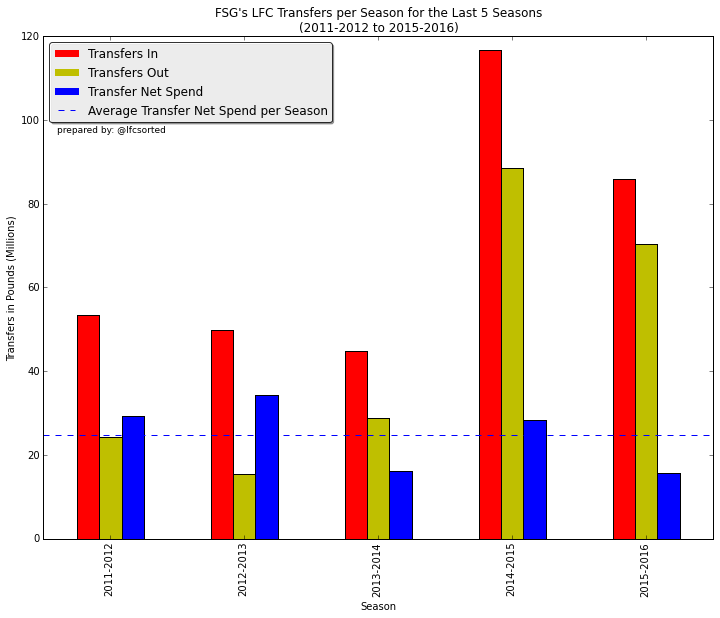

In [36]:
avg_netspend = df_fsg.ix['2011-2012':].NetSpend.mean()
print 'Average Transfer Net Spend per Season is £{}M'.format(round(avg_netspend, 1))
ax = df_fsg.ix['2011-2012':].plot(kind='bar', figsize=(12, 9), color=('r', 'y', 'b'), legend=False)
plt.axhline(avg_netspend, color='b', linestyle='--')
ax.set_ylabel('Transfers in Pounds (Millions)')
ax.set_title("FSG's LFC Transfers per Season for the Last 5 Seasons\n(2011-2012 to 2015-2016)")
ax.text(-.4, 97, 'prepared by: @lfcsorted', fontsize=9)

# create legend
l1 = plt.Line2D([], [], linewidth=7, color='r')
l2 = plt.Line2D([], [], linewidth=7, color='y')
l3 = plt.Line2D([], [], linewidth=7, color='b')
l4 = plt.Line2D([], [], linewidth=1, color='b', linestyle='--')
labels = ['Transfers In', 'Transfers Out', 'Transfer Net Spend', 'Average Transfer Net Spend per Season']
ax.legend([l1, l2, l3, l4], labels, fancybox=True, shadow=True, framealpha=0.8, loc='upper left')

# plot and save current figure
fig = plt.gcf() 
plt.show()
fig.savefig('FSGTransfersPerSeason2011-2015.png', bbox_inches='tight')

Now let's compare Liverpool's transfers to the other top 6 teams.

What is net spend per season for top 5 teams over last 5 seasons?

In [37]:
dfprem_transfers

,Position,Team,Purchased,Sold,NetSpend,PerSeasonSpend
0,1,Manchester City,472.7,150.3,322.4,64.5
1,2,Manchester United,405.2,139.5,265.7,53.1
2,4,Chelsea,461.8,246.4,215.4,43.1
3,3,Liverpool,349.0,186.4,162.6,32.5
4,5,Arsenal,253.6,154.6,99.0,19.8
5,6,West Ham,106.9,16.5,90.4,18.1
6,7,Newcastle,136.0,67.6,68.4,13.7
7,8,Sunderland,118.4,59.6,58.9,11.8
8,9,West Bromwich Albion,74.8,22.5,52.2,10.4
9,14,Crystal Palace,74.6,23.9,50.7,10.1


In [39]:
top6_2014_15 = [ 'Chelsea', 'Manchester City', 'Manchester United', 'Arsenal', 'Tottenham Hotspur', 'Liverpool']
df_prem_transfers_top6 = dfprem_transfers[['Team', 'PerSeasonSpend']][dfprem_transfers.Team.isin(top6_2014_15)]
df_prem_transfers_top6

,Team,PerSeasonSpend
0,Manchester City,64.5
1,Manchester United,53.1
2,Chelsea,43.1
3,Liverpool,32.5
4,Arsenal,19.8
19,Tottenham Hotspur,-7.3


Plot Top 6 Premier League Teams Average Transfer Net Spend per Season for Last 5 Seasons

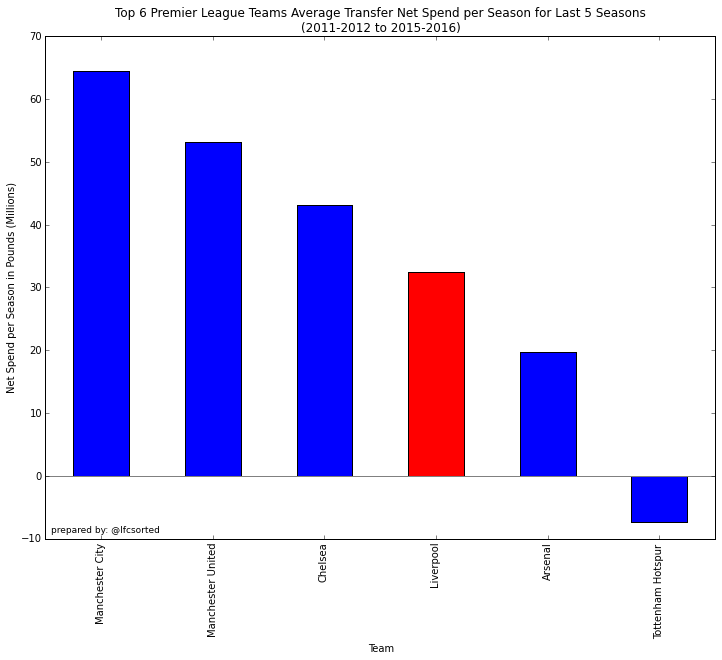

In [40]:
ax = df_prem_transfers_top6.plot(x='Team', kind='bar', figsize=(12, 9), color=('b', 'b', 'b', 'r', 'b', 'b'), legend=False)
ax.set_ylabel('Net Spend per Season in Pounds (Millions)')
ax.set_title("Top 6 Premier League Teams Average Transfer Net Spend per Season for Last 5 Seasons\n(2011-2012 to 2015-2016)")
plt.axhline(0, color='grey') # x axis at net spend = 0
ax.text(-0.45, -9, 'prepared by: @lfcsorted', fontsize=9)

# plot and save current figure
fig = plt.gcf() 
plt.show()
fig.savefig('PremTransferSpendPerSeason2011-2015.png', bbox_inches='tight')

What is the revenue of top 6 premier league clubs?

In [42]:
df_revenue.head(6)

,Revenue
Team,
Manchester United,433.2
Manchester City,346.5
Chelsea,324.4
Arsenal,300.5
Liverpool,255.8
Tottenham Hotspur,180.5


Plot Top 6 English Premier League Teams by Revenue

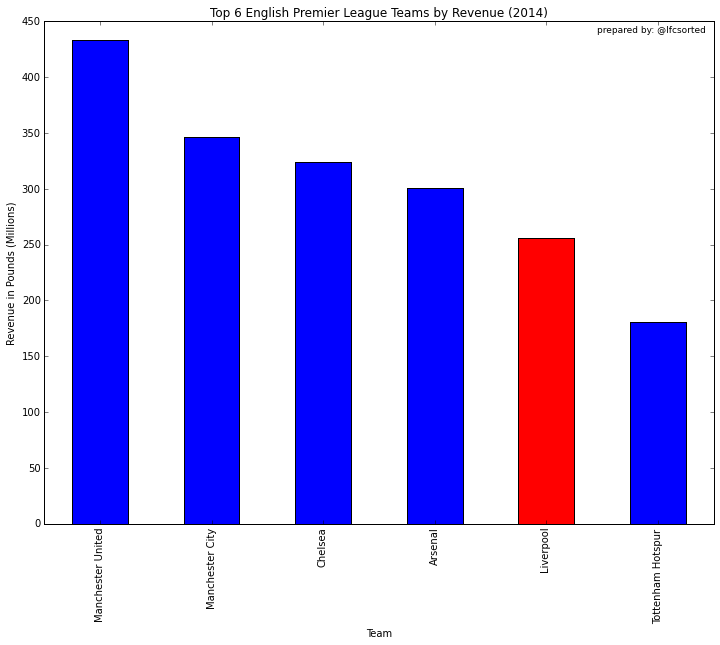

In [43]:
ax = df_revenue.plot(kind='bar', figsize=(12, 9), color=('b', 'b', 'b', 'b', 'r', 'b'), legend=False)
ax.set_ylabel('Revenue in Pounds (Millions)')
ax.set_title('Top 6 English Premier League Teams by Revenue (2014)')
ax.text(4.45, 440, 'prepared by: @lfcsorted', fontsize=9)

# plot and save current figure
fig = plt.gcf() 
plt.show()
fig.savefig('PremRevenue2014.png', bbox_inches='tight')

Let's now examine the age of the LIverpool transfers

First create new transfer dataframe with birthdate of player

In [44]:
dflfc_transfers.head()

,Season,Direction,Player,Club,Fee,Date
0,2010-2011,In,Luis Suarez,Ajax,22.8,2011-01-31
1,2010-2011,In,Andy Carroll,Newcastle United,35.0,2011-01-31
2,2010-2011,Out,Charles Itandje,Atromitos,0.0,2011-01-01
3,2010-2011,Out,Ryan Babel,Hoffenheim,5.8,2011-01-25
4,2010-2011,Out,Fernando Torres,Chelsea,50.0,2011-01-31


In [45]:
dflfc_transfers.shape

(90, 6)

In [46]:
dflfc_players.head()

,Player,Birthdate,Country
0,Gary Ablett,1965-11-19,England
1,Alan A'Court,1934-09-30,England
2,Charlie Adam,1985-12-10,Scotland
3,Daniel Agger,1984-12-12,Denmark
4,Andrew Aitken,1909-08-25,England


In [47]:
dflfc_transfers_with_dob = pd.DataFrame.merge(dflfc_transfers, dflfc_players, how='left')
dflfc_transfers_with_dob.shape

(90, 8)

In [48]:
dflfc_transfers_with_dob.head()

,Season,Direction,Player,Club,Fee,Date,Birthdate,Country
0,2010-2011,In,Luis Suarez,Ajax,22.8,2011-01-31,1987-01-24,Uruguay
1,2010-2011,In,Andy Carroll,Newcastle United,35.0,2011-01-31,1989-01-06,England
2,2010-2011,Out,Charles Itandje,Atromitos,0.0,2011-01-01,1982-11-02,France
3,2010-2011,Out,Ryan Babel,Hoffenheim,5.8,2011-01-25,1986-12-19,Netherlands
4,2010-2011,Out,Fernando Torres,Chelsea,50.0,2011-01-31,1984-03-20,Spain


In [49]:
dflfc_transfers_with_dob.dtypes

Season               object
Direction            object
Player               object
Club                 object
Fee                 float64
Date         datetime64[ns]
Birthdate    datetime64[ns]
Country              object
dtype: object

In [50]:
# check to see if any Birthdates are missing
dflfc_transfers_with_dob.Birthdate.isnull().any()

True

In [51]:
# show missing entries (these have been reported to lfchistory.net)
dflfc_transfers_with_dob[dflfc_transfers_with_dob.Birthdate.isnull()]

,Season,Direction,Player,Club,Fee,Date,Birthdate,Country
20,2011-2012,Out,Chris Mavinga,Rennes,1,2011-07-19,NaT,NaN
69,2014-2015,Out,Kristoffer Peterson,Utrecht,0,2014-08-27,NaT,NaN


In [52]:
# fill in mising data
dflfc_transfers_with_dob.loc[dflfc_transfers_with_dob.Player == 'Chris Mavinga', 'Country'] = 'France'
dflfc_transfers_with_dob.loc[dflfc_transfers_with_dob.Player == 'Chris Mavinga', 'Birthdate'] = pd.Timestamp('19910526')
dflfc_transfers_with_dob.loc[dflfc_transfers_with_dob.Player == 'Kristoffer Peterson', 'Country'] = 'Sweden'
dflfc_transfers_with_dob.loc[dflfc_transfers_with_dob.Player == 'Kristoffer Peterson', 'Birthdate'] = pd.Timestamp('19941128')
dflfc_transfers_with_dob[(dflfc_transfers_with_dob.Player == 'Chris Mavinga') | 
                         (dflfc_transfers_with_dob.Player == 'Kristoffer Peterson')]

,Season,Direction,Player,Club,Fee,Date,Birthdate,Country
20,2011-2012,Out,Chris Mavinga,Rennes,1,2011-07-19,1991-05-26,France
69,2014-2015,Out,Kristoffer Peterson,Utrecht,0,2014-08-27,1994-11-28,Sweden


Add age at transfer date to the dataframe

In [53]:
def age_at(dob, this_date):
    """Return age in years at this_date for given date of birth.
    
    Note that both dob and this_date are of type datetime."""
    
    return round((this_date - dob).days/365.0, 1)

In [54]:
dflfc_transfers_with_dob['AgeAtTransfer'] = dflfc_transfers_with_dob.apply(lambda row: age_at(row.Birthdate, row.Date), axis=1)
dflfc_transfers_with_dob.tail()

,Season,Direction,Player,Club,Fee,Date,Birthdate,Country,AgeAtTransfer
85,2015-2016,Out,Sebastian Coates,Sunderland,4.0,2015-07-01,1990-10-07,Uruguay,24.7
86,2015-2016,Out,Iago Aspas,Sevilla,4.4,2015-06-12,1987-08-01,Spain,27.9
87,2015-2016,Out,Raheem Sterling,Manchester City,49.0,2015-07-14,1994-12-08,Jamaica,20.6
88,2015-2016,Out,Rickie Lambert,West Bromwich Albion,3.0,2015-07-31,1982-02-16,England,33.5
89,2015-2016,Out,Fabio Borini,Sunderland,10.0,2015-08-31,1991-03-29,Italy,24.4


What is average age of incoming players by season?

Average age of all transfers in, including free

In [55]:
dflfc_transfers_with_dob[(dflfc_transfers_with_dob.Direction == 'In') & 
                         (dflfc_transfers_with_dob.Fee >= 0)]\
                        ['AgeAtTransfer'].mean()

23.749999999999996

Average age of all transfers in, excluding free

In [56]:
dflfc_transfers_with_dob[(dflfc_transfers_with_dob.Direction == 'In') & 
                         (dflfc_transfers_with_dob.Fee > 0)]\
                        ['AgeAtTransfer'].mean()

22.757575757575758

Average age of all transfers in, excluding free, by season

In [57]:
dflfc_transfers_with_dob[(dflfc_transfers_with_dob.Direction == 'In') & 
                         (dflfc_transfers_with_dob.Fee > 0)]\
                        [['Season', 'AgeAtTransfer']].groupby('Season').mean()

,AgeAtTransfer
Season,
2010-2011,23.050000
2011-2012,22.157143
2012-2013,21.666667
2013-2014,23.200000
2014-2015,23.750000
2015-2016,22.760000


Average age of all transfers in, including free, by season (rounded)

In [58]:
dflfc_transfers_with_dob[dflfc_transfers_with_dob.Direction == 'In']\
[['Season', 'AgeAtTransfer']].groupby('Season').agg(lambda x: round(x.mean(), 1))

,AgeAtTransfer
Season,
2010-2011,23.1
2011-2012,24.3
2012-2013,22.0
2013-2014,24.6
2014-2015,23.4
2015-2016,24.4


Plot age at transfer in

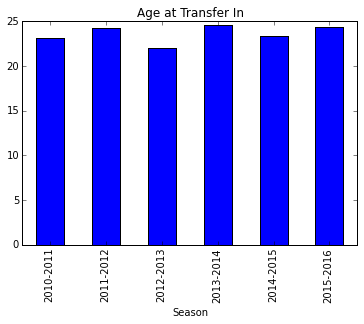

In [59]:
dflfc_transfers_with_dob[dflfc_transfers_with_dob.Direction == 'In']\
[['Season', 'AgeAtTransfer']].groupby('Season').agg(lambda x: round(x.mean(), 1)).plot(kind='bar', legend=False, 
                                                                                      title='Age at Transfer In')

What is average age of incoming and outgoing players by season

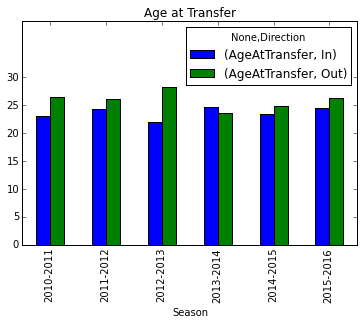

In [60]:
dflfc_transfers_with_dob[['Season', 'Direction', 'AgeAtTransfer']].groupby(['Season', 'Direction'])\
    .agg(lambda x: round(x.mean(), 1)).unstack()\
    .plot(kind='bar', title='Age at Transfer', ylim=(0,40), yticks=range(0,35,5))

Excluding free

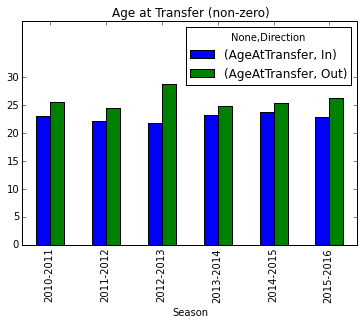

In [61]:
dflfc_transfers_with_dob[dflfc_transfers_with_dob.Fee > 0][['Season', 'Direction', 'AgeAtTransfer']].groupby(['Season', 'Direction'])\
    .agg(lambda x: round(x.mean(), 1)).unstack()\
    .plot(kind='bar', title='Age at Transfer (non-zero)', ylim=(0,40), yticks=range(0,35,5))

In [62]:
dflfc_transfers_with_dob[['Season', 'Direction', 'AgeAtTransfer']].groupby(['Season', 'Direction']).agg(lambda x: round(x.mean(), 1))

AgeAtTransfer
Season    Direction               
2010-2011 In                  23.1
          Out                 26.4
2011-2012 In                  24.3
          Out                 26.0
2012-2013 In                  22.0
          Out                 28.3
2013-2014 In                  24.6
          Out                 23.6
2014-2015 In                  23.4
          Out                 24.8
2015-2016 In                  24.4
          Out                 26.2

In [63]:
dflfc_transfers_with_dob[dflfc_transfers_with_dob.Fee > 0][['Season', 'Direction', 'AgeAtTransfer']].groupby(['Season', 'Direction']).agg(lambda x: round(x.mean(), 1))

AgeAtTransfer
Season    Direction               
2010-2011 In                  23.1
          Out                 25.5
2011-2012 In                  22.2
          Out                 24.5
2012-2013 In                  21.7
          Out                 28.8
2013-2014 In                  23.2
          Out                 24.9
2014-2015 In                  23.7
          Out                 25.4
2015-2016 In                  22.8
          Out                 26.2

#### Note that Outs do not include players leaving at end of contract e.g. Gerrard or those retiring e.g. Carragher

Analyse age of starting line-ups over last 3 seasons

In [64]:
LFC_GAME1_CSV_FILE = 'data\lfc_pl_opening_games_aug2015.csv'
dflfc_openers = pd.read_csv(LFC_GAME1_CSV_FILE, parse_dates=['Date'])

# show shape
dflfc_openers.shape

(66, 5)

In [65]:
dflfc_openers.tail()

,Season,Player,Opposition,Venue,Date
61,2010-2011,Joe Cole,Arsenal,Home,2010-08-15
62,2010-2011,Javier Mascherano,Arsenal,Home,2010-08-15
63,2010-2011,Milan Jovanovic,Arsenal,Home,2010-08-15
64,2010-2011,Dirk Kuyt,Arsenal,Home,2010-08-15
65,2010-2011,David N'Gog,Arsenal,Home,2010-08-15


Add age at opening game

In [66]:
dflfc_openers = pd.DataFrame.merge(dflfc_openers, dflfc_players[['Player', 'Birthdate']], how='left')
dflfc_openers.shape

(66, 6)

In [67]:
dflfc_openers.head()

,Season,Player,Opposition,Venue,Date,Birthdate
0,2015-2016,Simon Mignolet,Stoke,Away,2015-08-09,1988-03-06
1,2015-2016,Nathaniel Clyne,Stoke,Away,2015-08-09,1991-04-05
2,2015-2016,Dejan Lovren,Stoke,Away,2015-08-09,1989-07-05
3,2015-2016,Joe Gomez,Stoke,Away,2015-08-09,1997-05-23
4,2015-2016,Martin Skrtel,Stoke,Away,2015-08-09,1984-12-15


In [68]:
dflfc_openers['AgeAtOpener'] = dflfc_openers.apply(lambda row: age_at(row.Birthdate, row.Date), axis=1)
dflfc_openers.tail()

,Season,Player,Opposition,Venue,Date,Birthdate,AgeAtOpener
61,2010-2011,Joe Cole,Arsenal,Home,2010-08-15,1981-11-08,28.8
62,2010-2011,Javier Mascherano,Arsenal,Home,2010-08-15,1984-06-08,26.2
63,2010-2011,Milan Jovanovic,Arsenal,Home,2010-08-15,1981-04-18,29.3
64,2010-2011,Dirk Kuyt,Arsenal,Home,2010-08-15,1980-07-22,30.1
65,2010-2011,David N'Gog,Arsenal,Home,2010-08-15,1989-04-01,21.4


Calculate average age of team

In [69]:
dflfc_openers[['Season', 'AgeAtOpener']].groupby('Season').agg(lambda x: round(x.mean(), 1))

,AgeAtOpener
Season,
2010-2011,27.6
2011-2012,25.4
2012-2013,26.5
2013-2014,27.0
2014-2015,25.9
2015-2016,25.1


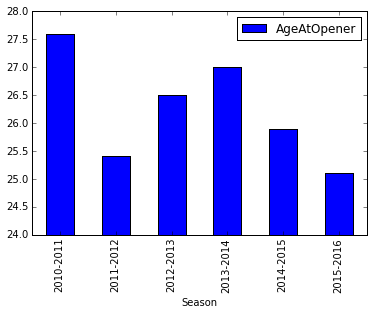

In [70]:
dflfc_openers[['Season', 'AgeAtOpener']].groupby('Season').agg(lambda x: round(x.mean(), 1)).plot(kind='bar', ylim=(24,28))

In [71]:
dflfc_transfers_with_dob[dflfc_transfers_with_dob.Direction == 'In'][['Season', 'Player', 'Fee', 'AgeAtTransfer']]

,Season,Player,Fee,AgeAtTransfer
0,2010-2011,Luis Suarez,22.80,24.0
1,2010-2011,Andy Carroll,35.00,22.1
5,2011-2012,Alexander Doni,0.00,31.8
6,2011-2012,Craig Bellamy,0.00,32.2
7,2011-2012,Jordon Ibe,0.50,16.0
8,2011-2012,Joao Carlos Teixeira,0.83,19.0
9,2011-2012,Sebastian Coates,4.90,20.9
10,2011-2012,Jose Enrique,6.00,25.6
11,2011-2012,Charlie Adam,6.75,25.6
12,2011-2012,Jordan Henderson,16.00,21.0


What is average age of team that *finished* againt Arsenal?

In [71]:
LFC_ARSENAL_CSV_FILE = 'data\lfc_pl_vs_Arsenal_aug2015.csv'
dflfc_arsenal = pd.read_csv(LFC_ARSENAL_CSV_FILE, parse_dates=['Date'], skiprows=2)

# show shape
dflfc_arsenal.shape

(11, 5)

In [72]:
dflfc_arsenal = pd.merge(dflfc_arsenal, dflfc_players[['Player', 'Birthdate']])
dflfc_arsenal

,Season,Player,Opposition,Venue,Date,Birthdate
0,2015-2016,Simon Mignolet,Arsenal,Away,2015-08-25,1988-03-06
1,2015-2016,Nathaniel Clyne,Arsenal,Away,2015-08-25,1991-04-05
2,2015-2016,Dejan Lovren,Arsenal,Away,2015-08-25,1989-07-05
3,2015-2016,Joe Gomez,Arsenal,Away,2015-08-25,1997-05-23
4,2015-2016,Martin Skrtel,Arsenal,Away,2015-08-25,1984-12-15
5,2015-2016,James Milner,Arsenal,Away,2015-08-25,1986-01-04
6,2015-2016,Alberto Moreno,Arsenal,Away,2015-08-25,1992-07-05
7,2015-2016,Jordan Henderson,Arsenal,Away,2015-08-25,1990-06-17
8,2015-2016,Jordan Rossiter,Arsenal,Away,2015-08-25,1997-03-24
9,2015-2016,Emre Can,Arsenal,Away,2015-08-25,1994-01-12


In [73]:
dflfc_arsenal['AgeAtGame'] = dflfc_arsenal.apply(lambda row: age_at(row.Birthdate, row.Date), axis=1)
dflfc_arsenal

,Season,Player,Opposition,Venue,Date,Birthdate,AgeAtGame
0,2015-2016,Simon Mignolet,Arsenal,Away,2015-08-25,1988-03-06,27.5
1,2015-2016,Nathaniel Clyne,Arsenal,Away,2015-08-25,1991-04-05,24.4
2,2015-2016,Dejan Lovren,Arsenal,Away,2015-08-25,1989-07-05,26.2
3,2015-2016,Joe Gomez,Arsenal,Away,2015-08-25,1997-05-23,18.3
4,2015-2016,Martin Skrtel,Arsenal,Away,2015-08-25,1984-12-15,30.7
5,2015-2016,James Milner,Arsenal,Away,2015-08-25,1986-01-04,29.7
6,2015-2016,Alberto Moreno,Arsenal,Away,2015-08-25,1992-07-05,23.2
7,2015-2016,Jordan Henderson,Arsenal,Away,2015-08-25,1990-06-17,25.2
8,2015-2016,Jordan Rossiter,Arsenal,Away,2015-08-25,1997-03-24,18.4
9,2015-2016,Emre Can,Arsenal,Away,2015-08-25,1994-01-12,21.6


In [74]:
dflfc_arsenal.mean()

AgeAtGame    24.536364
dtype: float64

Compare team wage bills for 2014-15

In [75]:
dfprem_wages[['Team', '2014-2015']].head()

,Team,2014-2015
0,Manchester United,215.8
1,Manchester City,205.0
2,Chelsea,192.7
3,Arsenal,166.4
4,Liverpool,144.0


In [76]:
 dfprem_table_2014_2015[['Team', 'PTS']].head()

,Team,PTS
0,Chelsea,87
1,Manchester City,79
2,Arsenal,75
3,Manchester United,70
4,Tottenham Hotspur,64


In [77]:
dfprem_table_2014_2015_wages = pd.merge(dfprem_table_2014_2015[['Team', 'PTS']], dfprem_wages[['Team', '2014-2015']])

In [78]:
dfprem_table_2014_2015_wages
dfprem_table_2014_2015_wages.rename(columns={'2014-2015': 'WageBill','PTS': 'Points'}, inplace=True)

In [79]:
dfprem_table_2014_2015_wages.head()

,Team,Points,WageBill
0,Chelsea,87,192.7
1,Manchester City,79,205.0
2,Arsenal,75,166.4
3,Manchester United,70,215.8
4,Tottenham Hotspur,64,100.4


In [80]:
dfprem_table_2014_2015.Rank[dfprem_table_2014_2015.Team == 'Chelsea'].values[0]

1

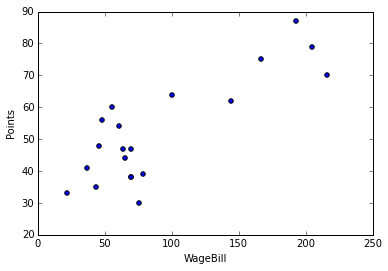

In [81]:
dfprem_table_2014_2015_wages.plot(kind='scatter', x='WageBill', y='Points')

In [82]:
df = dfprem_table_2014_2015_wages.set_index('Team')

In [83]:
(a,b) = df.ix['Liverpool']
print a, b

62.0 144.0


In [84]:
# Ref: http://stackoverflow.com/questions/739241/date-ordinal-output
def n_plus_suffix(n):
    """Return n plus the suffix e.g. 1 becomes 1st, 2 becomes 2nd."""
    assert isinstance(n, (int, long)), '{} is not an integer'.format(n)
    
    if 10 <= n % 100 < 20:
        return str(n) + 'th'
    else:
       return  str(n) + {1 : 'st', 2 : 'nd', 3 : 'rd'}.get(n % 10, "th")

Plot Wage Bill vs Points, with Top 6 highlighted (2014-2015)

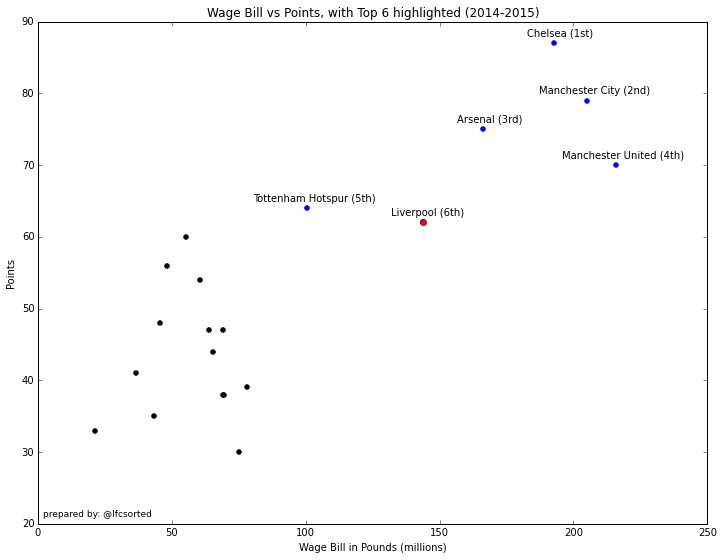

In [85]:
# calculate points total for 6th place
sixth_place_points = df.iloc[5].Points

# plot top 6 as blue circles
ax = df[df.Points >= sixth_place_points].plot(kind='scatter', x='WageBill', y='Points', figsize=(12,9), color='b')

# plot others as black circles
df[df.Points < sixth_place_points].plot(ax=ax, kind='scatter', x='WageBill', y='Points', figsize=(12,9), color='k')

# calculate Liverpool's points and plot as red circles
lfcpoints, lfcwage = df.ix['Liverpool']
ax.plot(lfcwage, lfcpoints, 'ro')

# add x and y labels etc
ax.set_xlabel('Wage Bill in Pounds (millions)')
ax.set_ylabel('Points')
ax.set_title('Wage Bill vs Points, with Top 6 highlighted (2014-2015)')
ax.text(2, 21, 'prepared by: @lfcsorted', fontsize=9)

# add text showing team and position for top 6
for team, (points, wagebill) in df.iterrows():
    pos = int(dfprem_table_2014_2015.Rank[dfprem_table_2014_2015.Team == team].values[0])
    team_pos = '{} ({})'.format(team, n_plus_suffix(pos))
    if points >= sixth_place_points:
        ax.annotate(s=team_pos, xy=(wagebill,points), xytext=(wagebill-len(team)-3, points+1))

Prettify the plot - label all teams and highlight the top 4 and top 6 areas. 

In [86]:
# list all of the teams
df.index.values

array(['Chelsea', 'Manchester City', 'Arsenal', 'Manchester United',
       'Tottenham Hotspur', 'Liverpool', 'Southampton', 'Swansea City',
       'Stoke City', 'Crystal Palace', 'Everton', 'West Ham United',
       'West Bromwich Albion', 'Leicester City', 'Newcastle United',
       'Sunderland', 'Aston Villa', 'Hull City', 'Burnley',
       'Queens Park Rangers'], dtype=object)

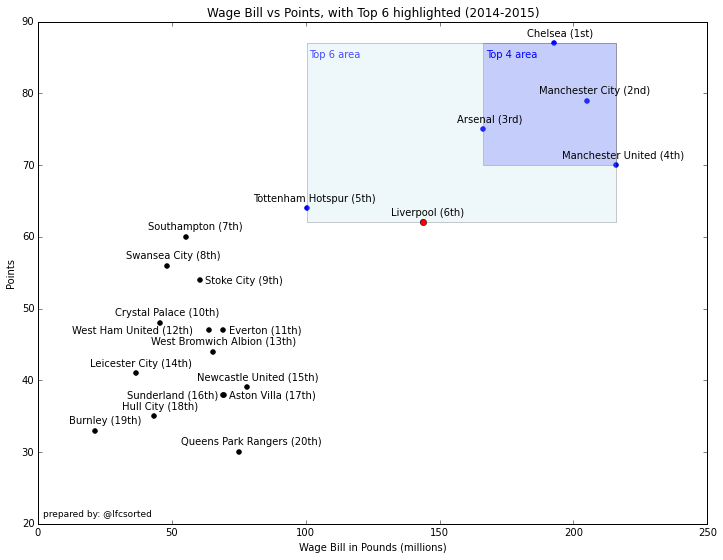

In [87]:
# set position of text, default is centred on top of the circle
# note that posotionis decided by trial and error, to give clearest plot
TEAM_CL = ['Sunderland', 'West Ham United']
TEAM_CR = ['Stoke City', 'Aston Villa', 'Everton']
TEAM_CT = []
for team in df.index.values:
    if team not in TEAM_CL + TEAM_CR:
        TEAM_CT.append(team)

    
# calculate points total for 6th place
sixth_place_points = df.iloc[5].Points

# plot top 6 as blue circles
ax = df[df.Points >= sixth_place_points].plot(kind='scatter', x='WageBill', y='Points', figsize=(12,9), color='b')

# plot others as black circles
df[df.Points < sixth_place_points].plot(ax=ax, kind='scatter', x='WageBill', y='Points', figsize=(12,9), color='k')

# calculate Liverpool's points and plot as red circles
lfcpoints, lfcwage = df.ix['Liverpool']
ax.plot(lfcwage, lfcpoints, 'ro')

# add x and y labels etc
ax.set_xlabel('Wage Bill in Pounds (millions)')
ax.set_ylabel('Points')
ax.set_title('Wage Bill vs Points, with Top 6 highlighted (2014-2015)')
ax.text(2, 21, 'prepared by: @lfcsorted', fontsize=9)

# add text showing team and position
for team, (points, wagebill) in df.iterrows():
    pos = int(dfprem_table_2014_2015.Rank[dfprem_table_2014_2015.Team == team].values[0])
    team_pos = '{} ({})'.format(team, n_plus_suffix(pos))
    if team in TEAM_CT:
        ax.annotate(s=team_pos, xy=(wagebill,points), xytext=(wagebill-len(team)-3, points+1))
    elif team in  TEAM_CR:
        #print 'team cr: {}'.format(team)
        ax.annotate(s=team_pos, xy=(wagebill,points), xytext=(wagebill+2, points-0.5))
    elif team in  TEAM_CL:
        #print 'team cl: {}'.format(team)
        ax.annotate(s=team_pos, xy=(wagebill,points), xytext=(wagebill-3*len(team)-6, points-0.5))
    else:
        raise('unexpected error')

# add key areas to the graph and label
from matplotlib.patches import Rectangle
XTEXT_OFFSET = 1
YTEXT_OFFSET = -2

# add top 4 area, with annotation in top left hand corner of rectangle
top4rect_bl_x = df[0:4].WageBill.min() # bottom left x co-ord of rectangle
top4rect_bl_y = df[0:4].Points.min() # bottom left y co-ord of rectangle
top4rect_width = df[0:4].WageBill.max() - top4rect_bl_x # width of rectangle
top4rect_height = df[0:4].Points.max() - top4rect_bl_y # height of rectangle
top4rect_tl_x = df[0:4].WageBill.min() # top left x co-ord for annotation
top4rect_tl_y = df[0:4].Points.max() # top left y co-ord for annotation
top4rect_xtext = top4rect_tl_x + XTEXT_OFFSET # text x co-ord for annotation
top4rect_ytext = top4rect_tl_y + YTEXT_OFFSET # text y co-ord for annotation
ax.add_patch(Rectangle((top4rect_bl_x, top4rect_bl_y), top4rect_width, top4rect_height, facecolor="blue", alpha=0.2))
ax.annotate(s='Top 4 area', xy=(top4rect_tl_x, top4rect_tl_y), xytext=(top4rect_xtext, top4rect_ytext), color='blue')

# add top 6 area, with annotation in top left hand corner of rectangle
top6rect_bl_x = df[0:6].WageBill.min() # bottom left x co-ord of rectangle
top6rect_bl_y = df[0:6].Points.min() # bottom left y co-ord of rectangle
top6rect_width = df[0:6].WageBill.max() - top6rect_bl_x # width of rectangle
top6rect_height = df[0:6].Points.max() - top6rect_bl_y # height of rectangle
top6rect_tl_x = df[0:6].WageBill.min() # top left x co-ord for annotation
top6rect_tl_y = df[0:6].Points.max() # top left y co-ord for annotation
top6rect_xtext = top6rect_tl_x + XTEXT_OFFSET # text x co-ord for annotation
top6rect_ytext = top6rect_tl_y + YTEXT_OFFSET # text y co-ord for annotation
ax.add_patch(Rectangle((top6rect_bl_x, top6rect_bl_y), top6rect_width, top6rect_height, facecolor="lightblue", alpha=0.2))
ax.annotate(s='Top 6 area', xy=(top6rect_tl_x, top6rect_tl_y), xytext=(top6rect_xtext, top6rect_ytext), color='blue', alpha=0.7)

# plot and save current figure
fig = plt.gcf() 
plt.show()
fig.savefig('PremWageBillvsPoints2014-2015.png', bbox_inches='tight')